# Quantum Machine Learning Breast Cancer Wisconsin Dataset

In [1]:
!pip install qiskit pylatexenc qiskit_machine_learning

  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ | done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━

# Training a Quantum Model on a Breast Cancer Wisconsin Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from functools import reduce
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Exploratory Data Analysis

In [3]:
breast_cancer_dataset = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")

In [4]:
breast_cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
breast_cancer_dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
breast_cancer_dataset.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
69,859487,B,12.780,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.02864,...,19.76,85.67,554.9,0.1296,0.07061,0.1039,0.05882,0.2383,0.06410,NaN
134,867739,M,18.450,21.91,120.20,1075.0,0.09430,0.09709,0.11530,0.06847,...,31.39,145.60,1590.0,0.1465,0.22750,0.3965,0.13790,0.3109,0.07610,NaN
259,88725602,M,15.530,33.56,103.70,744.9,0.10630,0.16390,0.17510,0.08399,...,49.54,126.30,1035.0,0.1883,0.55640,0.5703,0.20140,0.3512,0.12040,NaN
213,881094802,M,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,...,28.07,120.40,1021.0,0.1243,0.17930,0.2803,0.10990,0.1603,0.06818,NaN
533,91930402,M,20.470,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.10150,...,27.15,152.00,1645.0,0.1097,0.25340,0.3092,0.16130,0.3220,0.06386,NaN
176,872608,B,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,...,24.39,73.07,390.2,0.1301,0.29500,0.3486,0.09910,0.2614,0.11620,NaN
138,868826,M,14.950,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,...,21.43,121.40,971.4,0.1411,0.21640,0.3355,0.16670,0.3414,0.07147,NaN
92,861853,B,13.270,14.76,84.74,551.7,0.07355,0.05055,0.03261,0.02648,...,22.35,104.50,830.6,0.1006,0.12380,0.1350,0.10010,0.2027,0.06206,NaN
210,881046502,M,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,...,27.84,158.30,1656.0,0.1178,0.29200,0.3861,0.19200,0.2909,0.05865,NaN
512,915691,M,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,...,29.66,113.30,844.4,0.1574,0.38560,0.5106,0.20510,0.3585,0.11090,NaN


In [7]:
breast_cancer_dataset.shape

(569, 33)

In [8]:
# Dapatkan daftar jenis semua kolom di dataset
breast_cancer_dataset.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
# Mencari tahu apakah dataset berisi nilai nol
breast_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
breast_cancer_dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [11]:
breast_cancer_dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Preprocessing Data

In [12]:
breast_cancer_dataset['diagnosis'] = breast_cancer_dataset['diagnosis'].replace(['B', 'M'], [0, 1])

In [13]:
breast_cancer_dataset = breast_cancer_dataset.drop(['id', 'Unnamed: 32'], axis=1)

In [14]:
# Mencari tahu apakah dataset berisi nilai nol
breast_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [15]:
breast_cancer_dataset.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
breast_cancer_dataset.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
diagnosis_col = breast_cancer_dataset.pop('diagnosis')
breast_cancer_dataset.insert(30, 'diagnosis', diagnosis_col)

In [18]:
breast_cancer_dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [19]:
breast_cancer_dataset.shape

(569, 31)

# Data Visualization

Negative (0):  357
Positive (1):  212


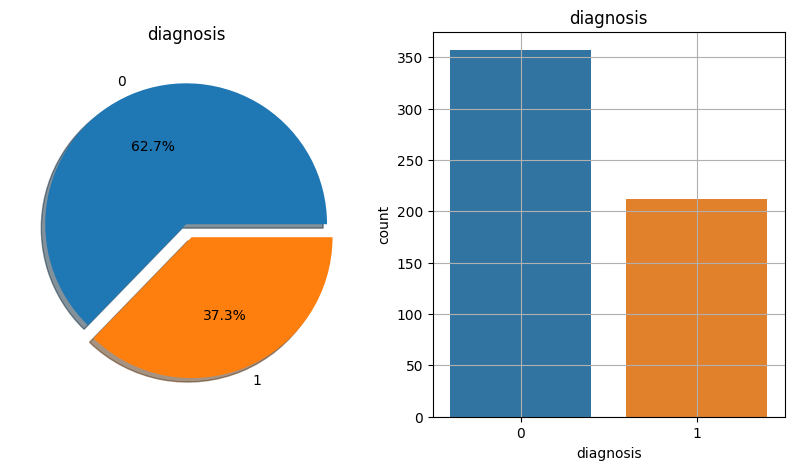

In [20]:
# outcome count plot
f, ax = plt.subplots(1, 2, figsize=(10, 5))
# Pie chart
breast_cancer_dataset['diagnosis'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
# Count plot
sns.countplot(x='diagnosis', data=breast_cancer_dataset, ax=ax[1])
ax[1].set_title('diagnosis')
N, P = breast_cancer_dataset['diagnosis'].value_counts()
print('Negative (0): ', N)
print('Positive (1): ', P)
plt.grid()
plt.show()

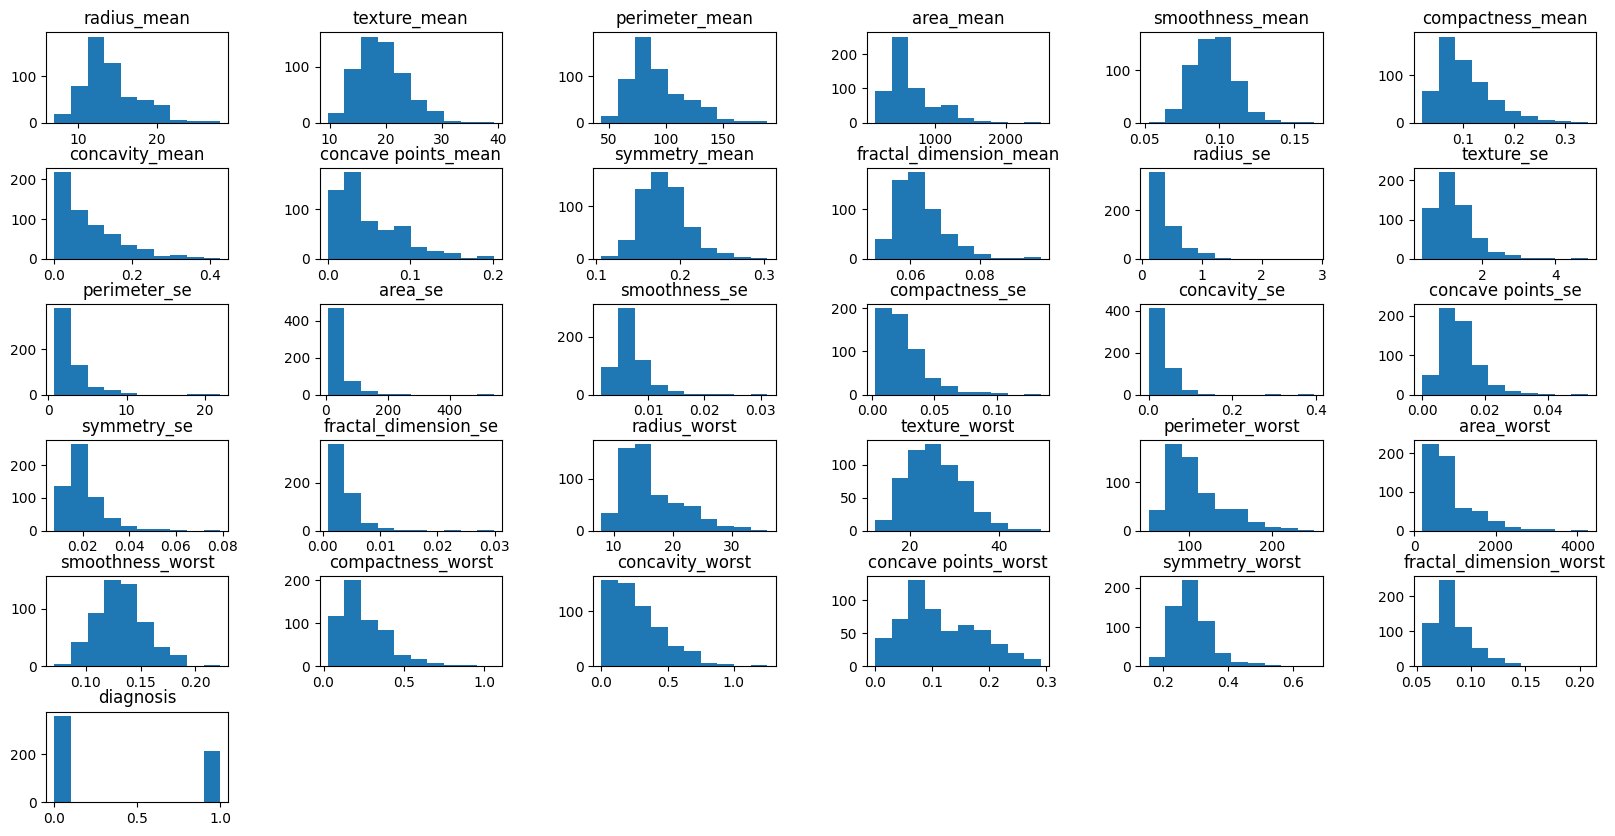

In [21]:
import math
import matplotlib.pyplot as plt

# Menghitung jumlah baris dan kolom yang dibutuhkan
n_cols = len(breast_cancer_dataset.columns)
n_rows = math.ceil(n_cols/6)

# Mengatur ukuran figure
fig, axes = plt.subplots(nrows=n_rows, ncols=6, figsize=(20, 10))

# Mengatur jarak antar subplot
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Menampilkan histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < n_cols:
        ax.hist(breast_cancer_dataset.iloc[:, i], bins=10)
        ax.set_title(breast_cancer_dataset.columns[i])
    else:
        fig.delaxes(ax) # Menghapus subplot yang tersisa

# Menampilkan grafik
plt.show()

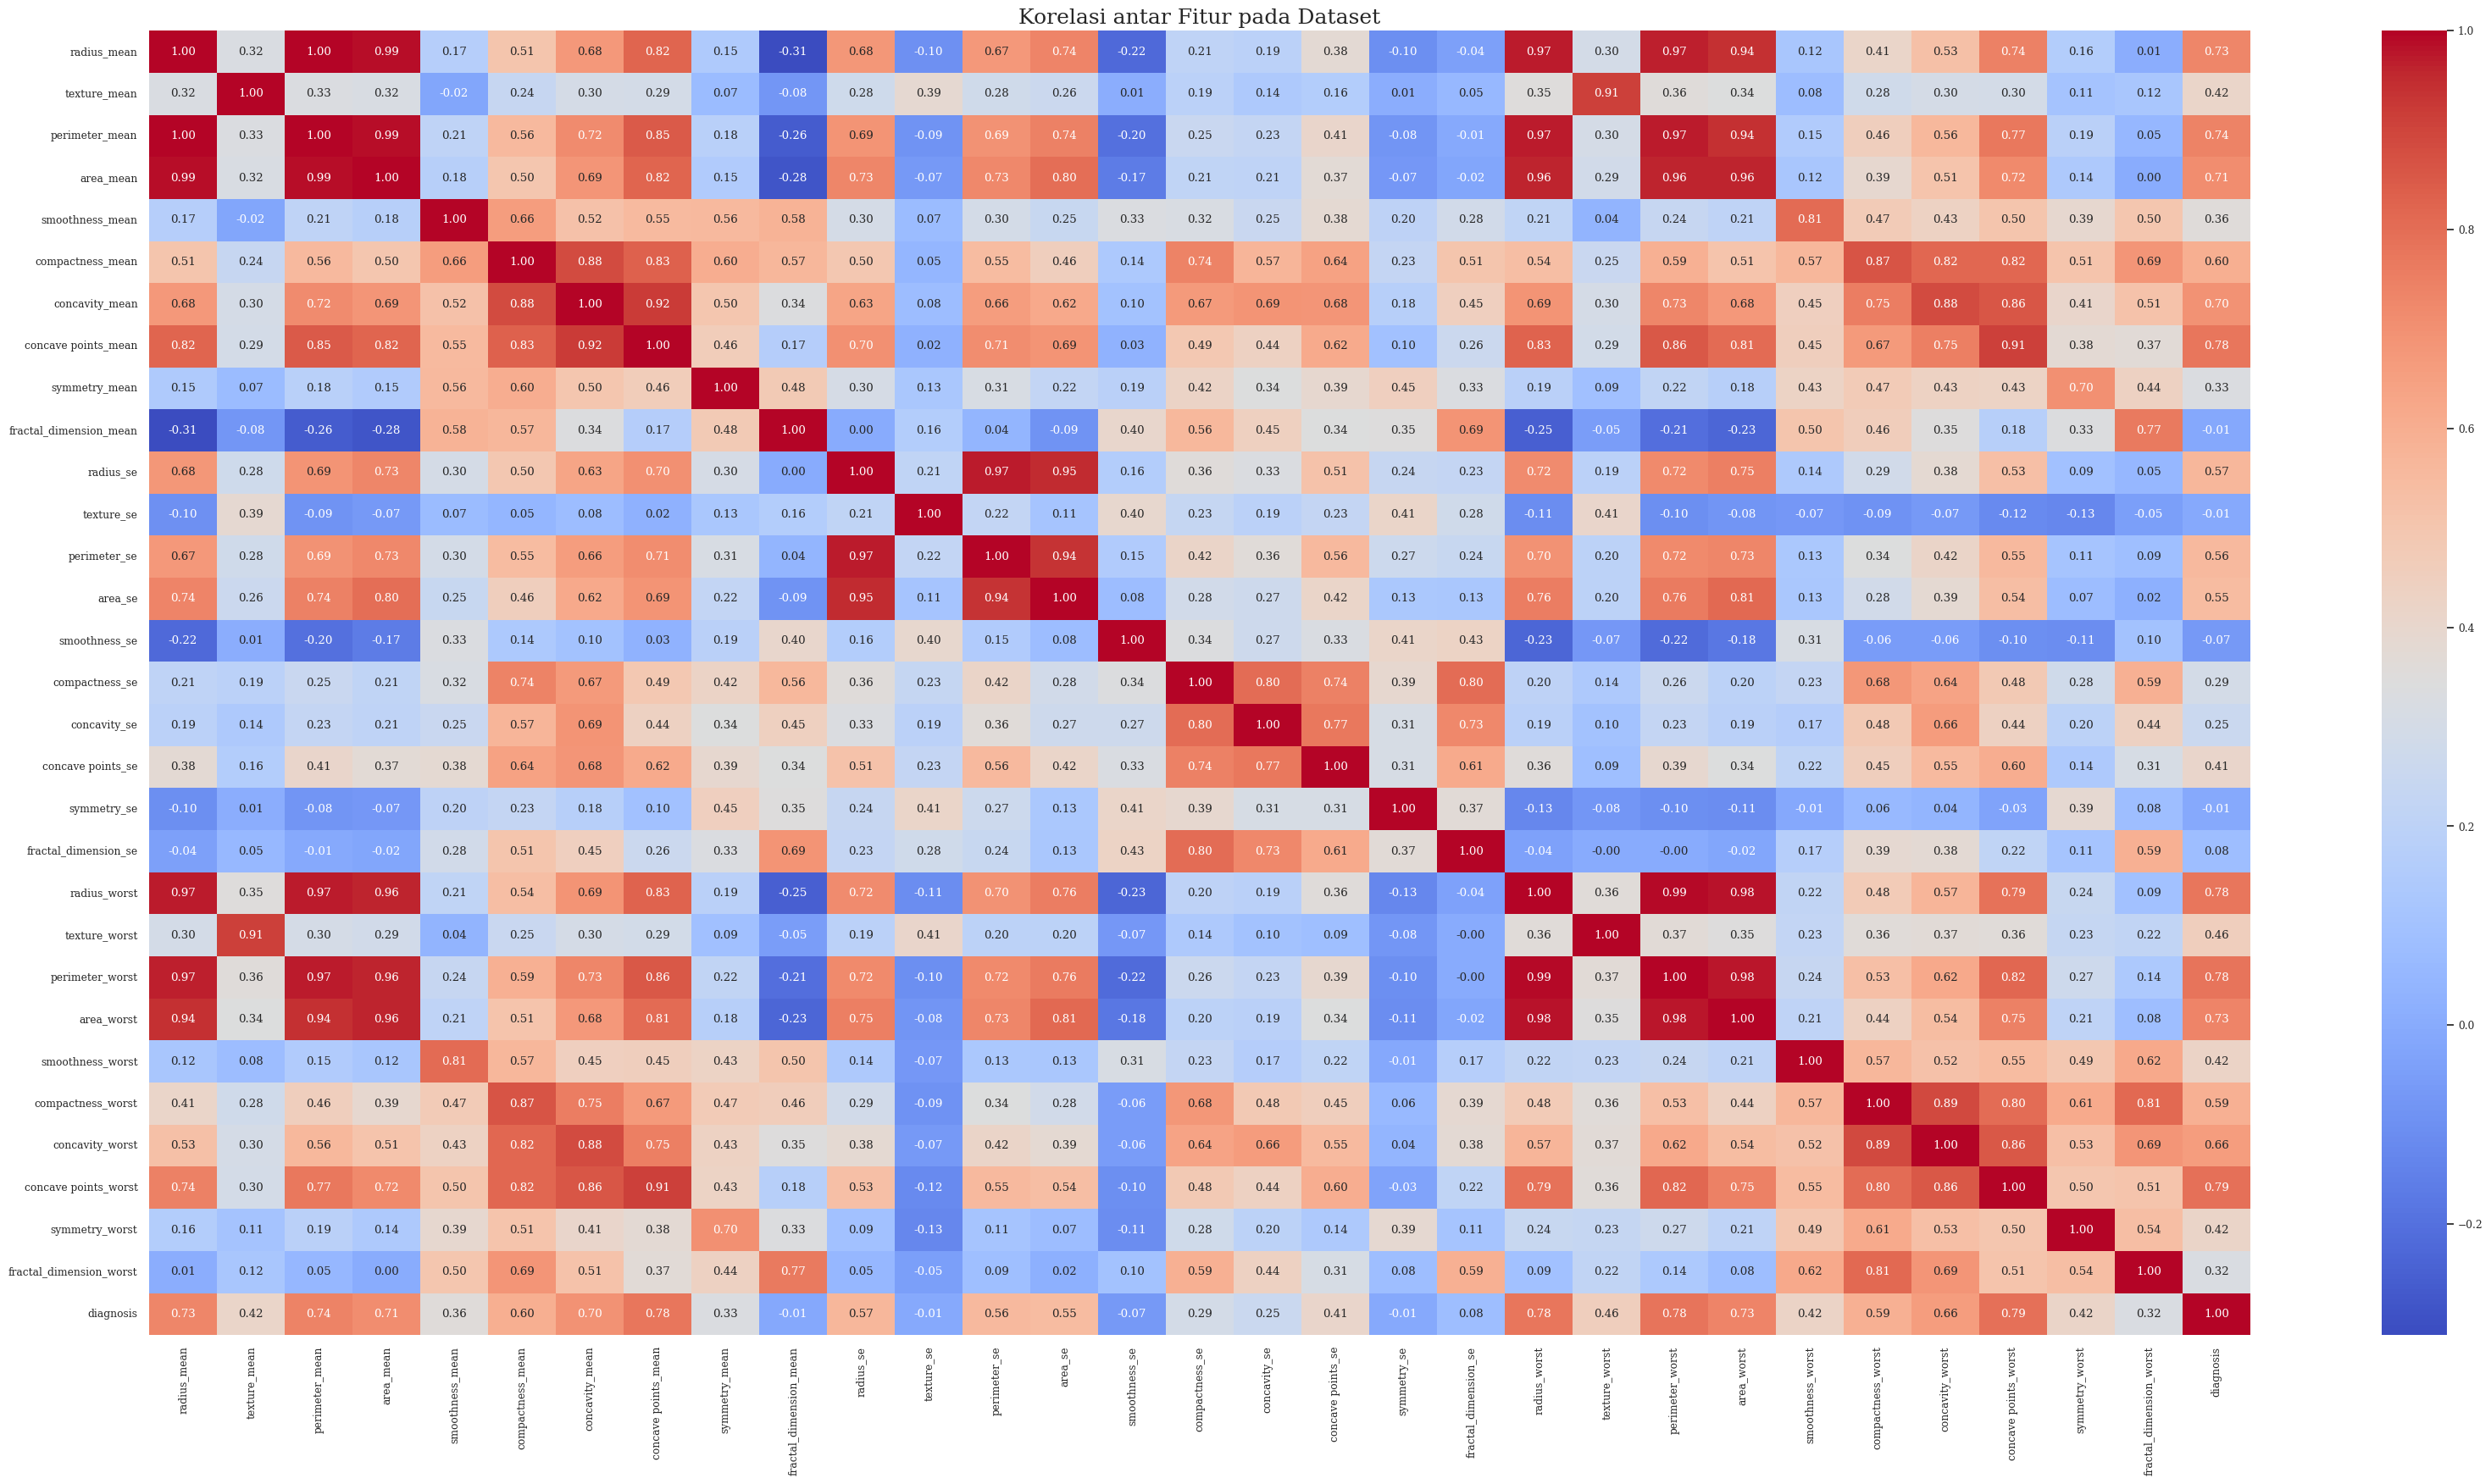

In [22]:
# melihat korelasi antar kolom pada dataset
corr = breast_cancer_dataset.corr()

# memperkecil ukuran heatmap
plt.figure(figsize=(40, 20))

# menyesuaikan ukuran kolom dan baris pada dataset
sns.set(font_scale=0.8)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Korelasi antar Fitur pada Dataset', fontsize=18)
plt.show()

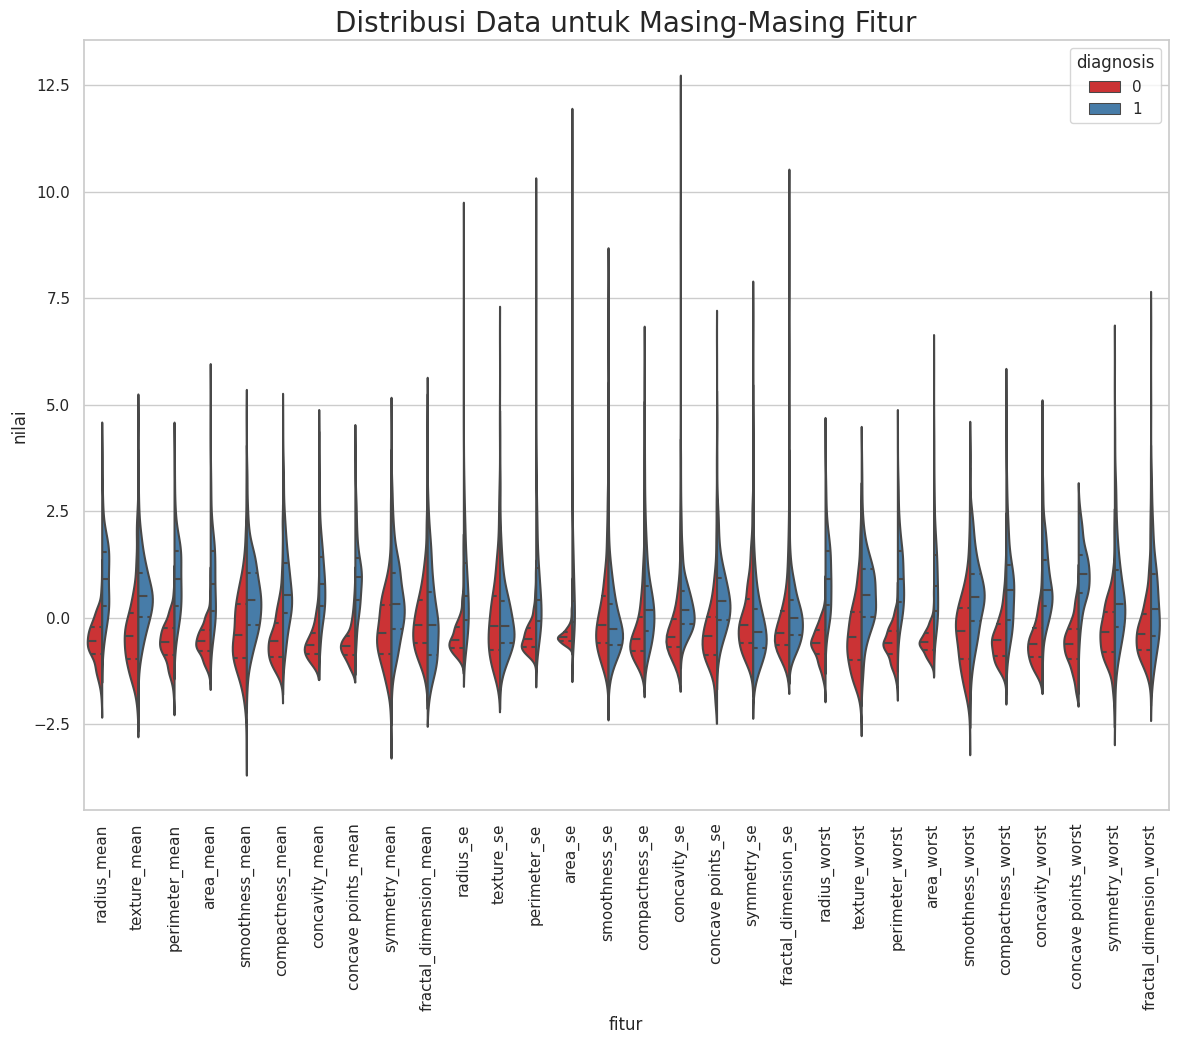

In [23]:
# visualisasi distribusi data untuk masing-masing fitur
sns.set(style='whitegrid', palette='muted')
data_diagnosis = breast_cancer_dataset['diagnosis']
data_features = breast_cancer_dataset.drop(['diagnosis'], axis=1)
data_features_std = (data_features - data_features.mean()) / data_features.std()
data = pd.concat([data_diagnosis, data_features_std], axis=1)
data = pd.melt(data, id_vars='diagnosis',
               var_name='fitur', value_name='nilai')
plt.figure(figsize=(14, 10))
sns.violinplot(x='fitur', y='nilai',
               hue='diagnosis', data=data, split=True,
               inner='quart', palette='Set1')
plt.xticks(rotation=90)
plt.title('Distribusi Data untuk Masing-Masing Fitur', fontsize=20)
plt.show()

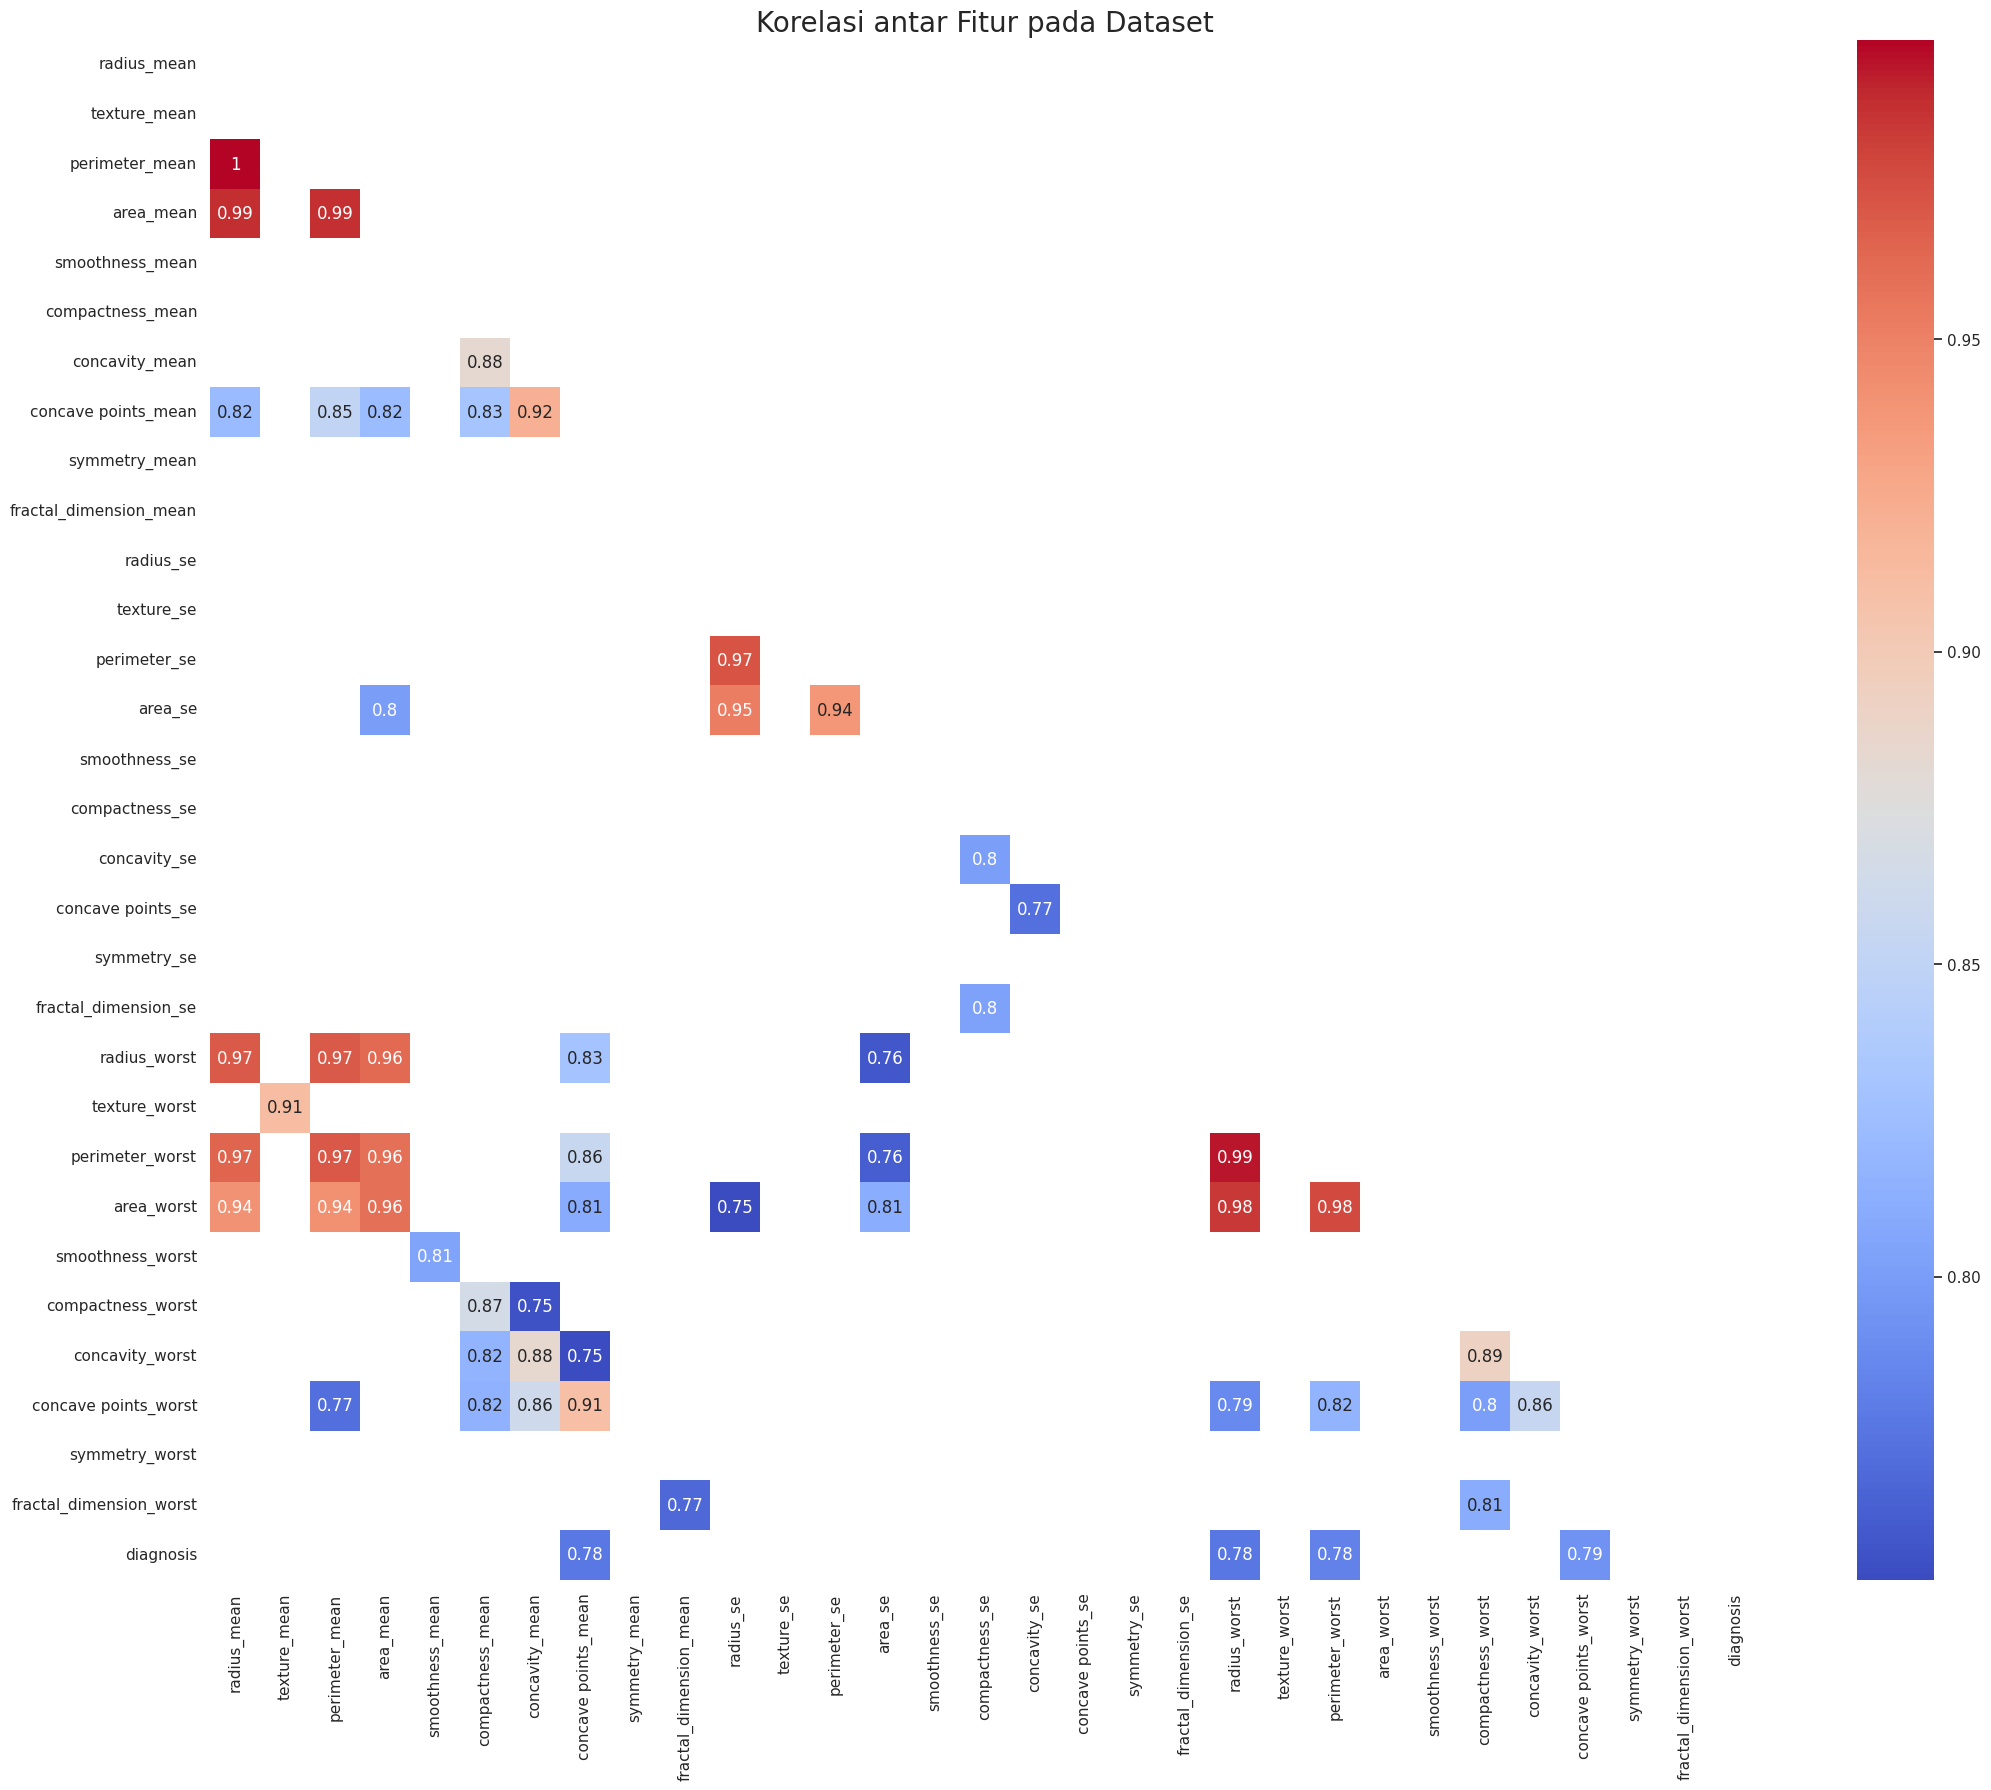

In [24]:
corr = breast_cancer_dataset.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# memperkecil ukuran heatmap
plt.figure(figsize=(25, 20))

sns.heatmap(corr[(corr > 0.75) | (corr < -0.75)], mask=mask, annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur pada Dataset', fontsize=20)
plt.show()

# Feature Selection

In [25]:
# memilih fitur yang memiliki korelasi tinggi dengan data target
threshold = 0.75
relevant_features = corr[abs(corr['diagnosis']) > threshold]['diagnosis']
relevant_features = relevant_features.drop('diagnosis')

# mencetak fitur yang terpilih
print('Fitur yang terpilih:')
print(relevant_features)

# memilih subset data hanya dengan fitur yang terpilih
data_subset = breast_cancer_dataset[relevant_features.index.tolist() + ['diagnosis']]
print('Ukuran data subset:', data_subset.shape)

Fitur yang terpilih:
concave points_mean     0.776614
radius_worst            0.776454
perimeter_worst         0.782914
concave points_worst    0.793566
Name: diagnosis, dtype: float64
Ukuran data subset: (569, 5)


In [26]:
data_subset

,concave points_mean,radius_worst,perimeter_worst,concave points_worst,diagnosis
0,0.14710,25.380,184.60,0.2654,1
1,0.07017,24.990,158.80,0.1860,1
2,0.12790,23.570,152.50,0.2430,1
3,0.10520,14.910,98.87,0.2575,1
4,0.10430,22.540,152.20,0.1625,1
...,...,...,...,...,...
564,0.13890,25.450,166.10,0.2216,1
565,0.09791,23.690,155.00,0.1628,1
566,0.05302,18.980,126.70,0.1418,1
567,0.15200,25.740,184.60,0.2650,1


In [27]:
breast_cancer_dataset = data_subset

In [28]:
breast_cancer_dataset

,concave points_mean,radius_worst,perimeter_worst,concave points_worst,diagnosis
0,0.14710,25.380,184.60,0.2654,1
1,0.07017,24.990,158.80,0.1860,1
2,0.12790,23.570,152.50,0.2430,1
3,0.10520,14.910,98.87,0.2575,1
4,0.10430,22.540,152.20,0.1625,1
...,...,...,...,...,...
564,0.13890,25.450,166.10,0.2216,1
565,0.09791,23.690,155.00,0.1628,1
566,0.05302,18.980,126.70,0.1418,1
567,0.15200,25.740,184.60,0.2650,1


# Normalize

In [29]:
target_name = 'diagnosis'
labels_dataset = breast_cancer_dataset[target_name]
features_dataset = breast_cancer_dataset.drop(target_name, axis=1)

print("Features =\n", features_dataset)
print("labels =\n", labels_dataset)

Features =
      concave points_mean  radius_worst  perimeter_worst  concave points_worst
0                0.14710        25.380           184.60                0.2654
1                0.07017        24.990           158.80                0.1860
2                0.12790        23.570           152.50                0.2430
3                0.10520        14.910            98.87                0.2575
4                0.10430        22.540           152.20                0.1625
..                   ...           ...              ...                   ...
564              0.13890        25.450           166.10                0.2216
565              0.09791        23.690           155.00                0.1628
566              0.05302        18.980           126.70                0.1418
567              0.15200        25.740           184.60                0.2650
568              0.00000         9.456            59.16                0.0000

[569 rows x 4 columns]
labels =
 0      1
1      1


In [30]:
features_dataset.head()

,concave points_mean,radius_worst,perimeter_worst,concave points_worst
0,0.14710,25.38,184.60,0.2654
1,0.07017,24.99,158.80,0.1860
2,0.12790,23.57,152.50,0.2430
3,0.10520,14.91,98.87,0.2575
4,0.10430,22.54,152.20,0.1625


In [31]:
labels_dataset.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [32]:
from sklearn.preprocessing import MinMaxScaler

features_dataset = MinMaxScaler().fit_transform(features_dataset)

# Classic Machine Learning

In [33]:
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals
from sklearn.svm import SVC

algorithm_globals.random_seed = 123

train_features, test_features, train_labels, test_labels = train_test_split(
    features_dataset, labels_dataset, train_size=0.8, random_state=algorithm_globals.random_seed
)

svc = SVC()
svc.fit(train_features, train_labels)

train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.95
Classical SVC on the test dataset:     0.96


# Quantum Machine Learning

In [34]:
def data_map_eq12(x: np.ndarray) -> float:
    coeff = x[0] if len(x) == 1 else reduce(lambda m, n: np.pi*(m * n), np.cos(x))
    return coeff

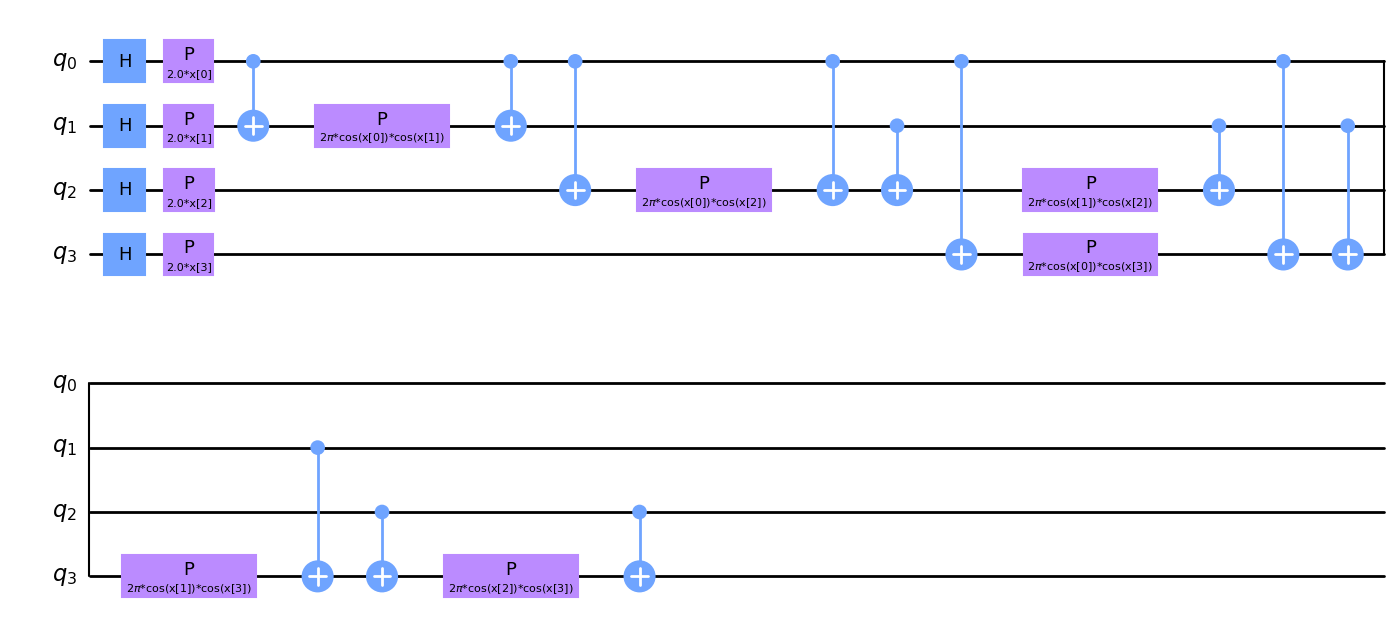

In [35]:
from qiskit.circuit.library import PauliFeatureMap

num_features = features_dataset.shape[1]

feature_map = PauliFeatureMap(feature_dimension=num_features, reps=1, data_map_func=data_map_eq12)
feature_map.decompose().draw(output="mpl", fold=20)

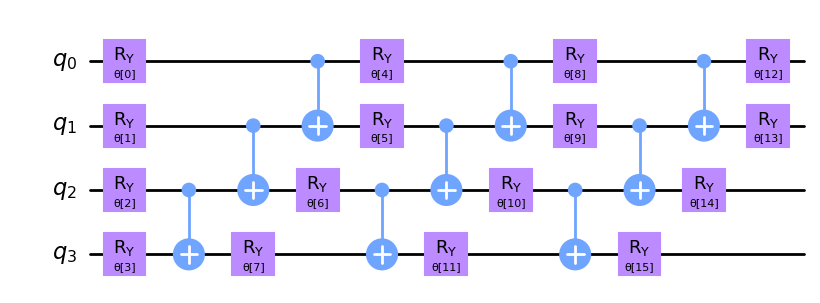

In [36]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [37]:
from qiskit.algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [38]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [39]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

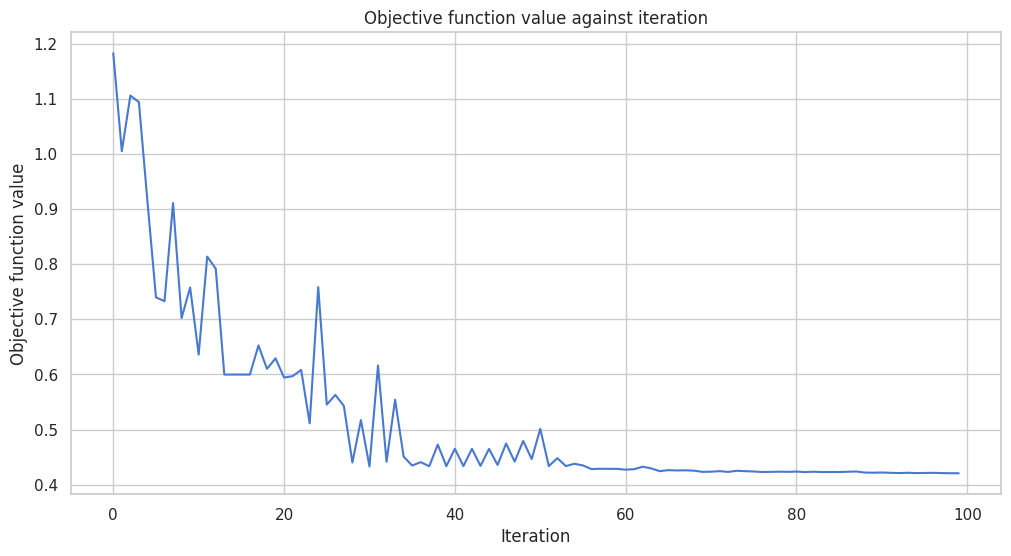

Training time: 491 seconds


In [40]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# Convert pandas Series to numpy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [41]:
train_score_q4_ra = vqc.score(train_features, train_labels)
test_score_q4_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC RealAmplitudes on the training dataset: {train_score_q4_ra:.2f}")
print(f"Quantum VQC RealAmplitudes on the test dataset:     {test_score_q4_ra:.2f}")

Quantum VQC RealAmplitudes on the training dataset: 0.93
Quantum VQC RealAmplitudes on the test dataset:     0.95


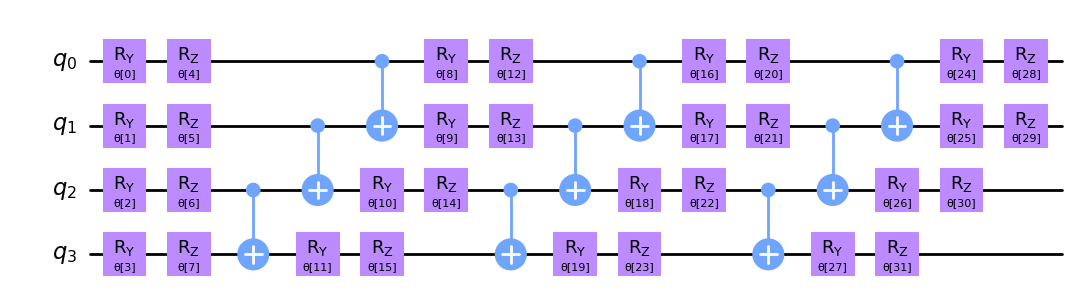

In [42]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

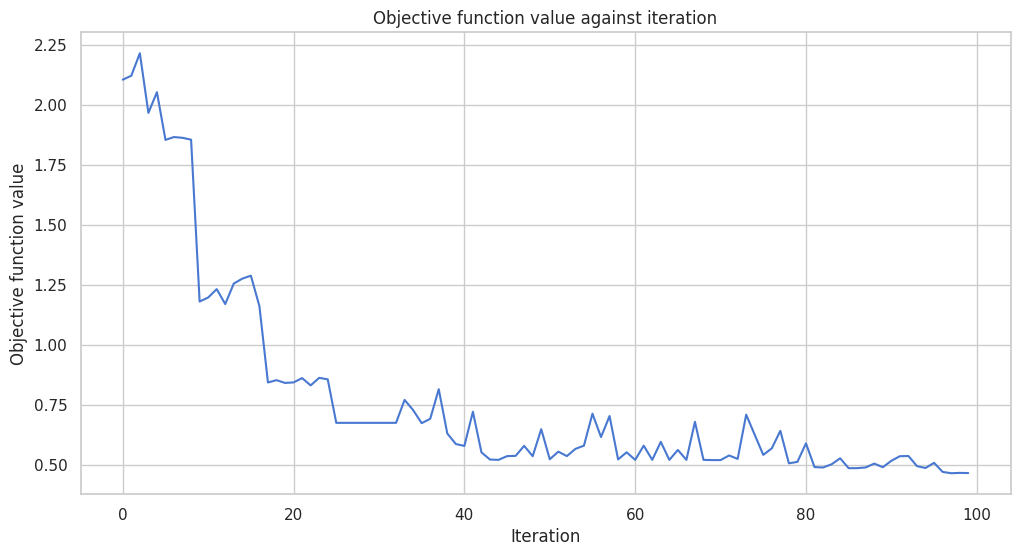

Training time: 669 seconds


In [43]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# Convert pandas Series to numpy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [44]:
train_score_q4_eff = vqc.score(train_features, train_labels)
test_score_q4_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC EfficientSU2 on the training dataset: {train_score_q4_eff:.2f}")
print(f"Quantum VQC EfficientSU2 on the test dataset:     {test_score_q4_eff:.2f}")

Quantum VQC EfficientSU2 on the training dataset: 0.88
Quantum VQC EfficientSU2 on the test dataset:     0.87


# Reducing the Number of Features With Principal Component Analysis (PCA)

<AxesSubplot: >

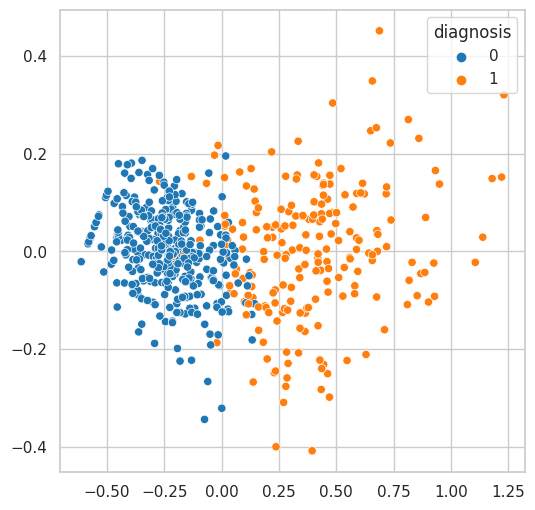

In [45]:
from sklearn.decomposition import PCA

features_dataset = PCA(n_components=2).fit_transform(features_dataset)

plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=features_dataset[:, 0], y=features_dataset[:, 1], hue=labels_dataset, palette="tab10")

# Classic Machine Learning

In [46]:
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals
from sklearn.svm import SVC

algorithm_globals.random_seed = 123

train_features, test_features, train_labels, test_labels = train_test_split(
    features_dataset, labels_dataset, train_size=0.8, random_state=algorithm_globals.random_seed
)

svc = SVC()
svc.fit(train_features, train_labels)

train_score_c2 = svc.score(train_features, train_labels)
test_score_c2 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c2:.2f}")

Classical SVC on the training dataset: 0.95
Classical SVC on the test dataset:     0.96


# Quantum Machine Learning

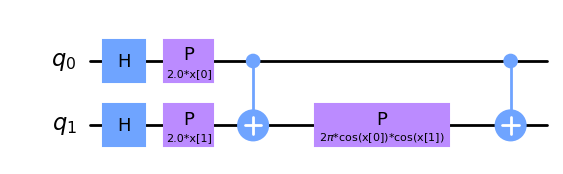

In [47]:
from qiskit.circuit.library import PauliFeatureMap

num_features = features_dataset.shape[1]

feature_map = PauliFeatureMap(feature_dimension=num_features, reps=1, data_map_func=data_map_eq12)
feature_map.decompose().draw(output="mpl", fold=20)

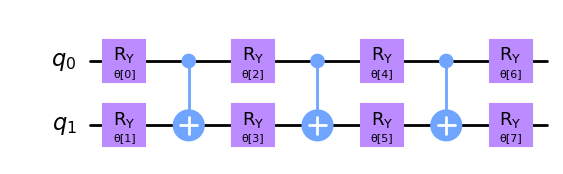

In [48]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [49]:
from qiskit.algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [50]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [51]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

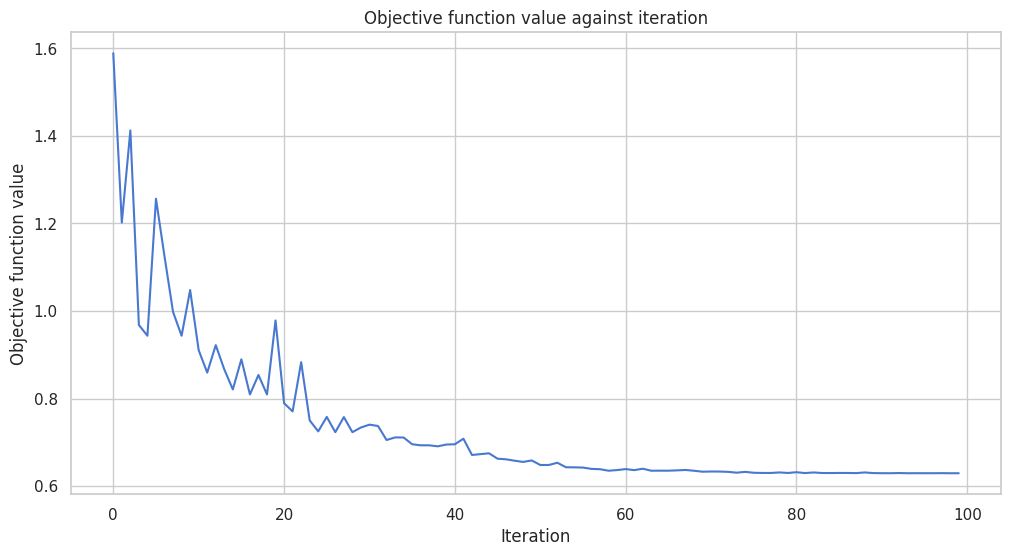

Training time: 215 seconds


In [52]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# Convert pandas Series to numpy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [53]:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.80
Quantum VQC on the test dataset using RealAmplitudes:     0.76


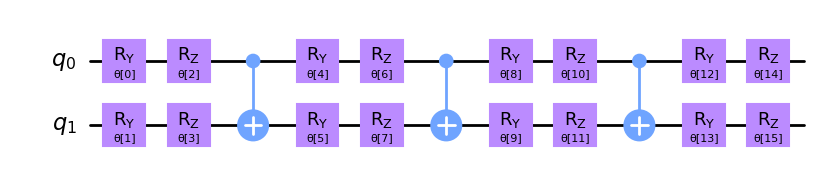

In [54]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

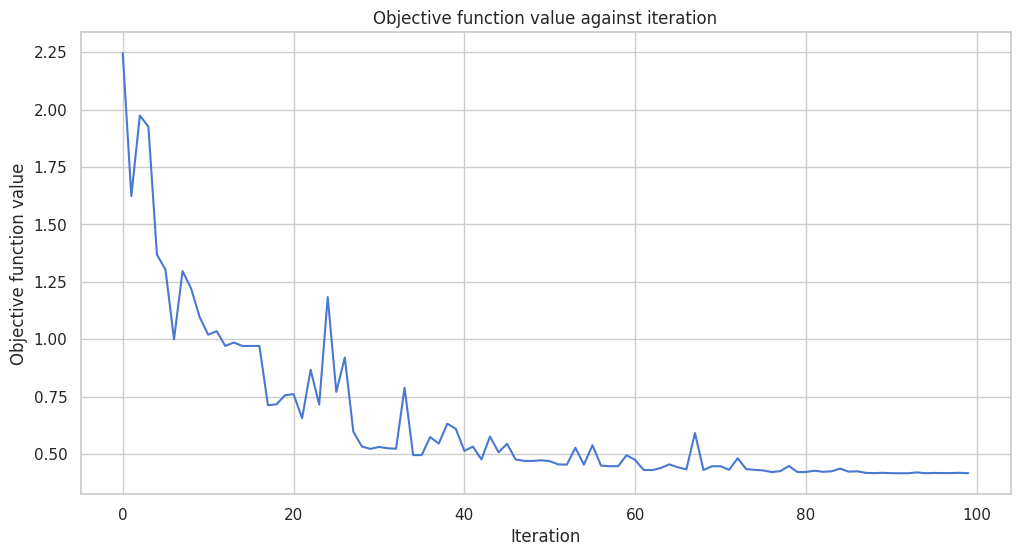

Training time: 293 seconds


In [55]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# Convert pandas Series to numpy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [56]:
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.92
Quantum VQC on the test dataset using EfficientSU2:     0.90


In [57]:
print(f"Model                           | Train Score | Test Score")
print(f"SVC, 4 features                 | {train_score_c4:11.2f} | {test_score_c4:10.2f}")
print(f"VQC, 4 features, RealAmplitudes | {train_score_q4_ra:11.2f} | {test_score_q4_ra:10.2f}")
print(f"VQC, 4 features, EfficientSU2   | {train_score_q4_eff:11.2f} | {test_score_q4_eff:10.2f}")
print(f"----------------------------------------------------------")
print(f"SVC, 2 features                 | {train_score_c2:11.2f} | {test_score_c2:10.2f}")
print(f"VQC, 2 features, RealAmplitudes | {train_score_q2_ra:11.2f} | {test_score_q2_ra:10.2f}")
print(f"VQC, 2 features, EfficientSU2   | {train_score_q2_eff:11.2f} | {test_score_q2_eff:10.2f}")

Model                           | Train Score | Test Score
SVC, 4 features                 |        0.95 |       0.96
VQC, 4 features, RealAmplitudes |        0.93 |       0.95
VQC, 4 features, EfficientSU2   |        0.88 |       0.87
----------------------------------------------------------
SVC, 2 features                 |        0.95 |       0.96
VQC, 2 features, RealAmplitudes |        0.80 |       0.76
VQC, 2 features, EfficientSU2   |        0.92 |       0.90
